https://vitalflux.com/autoregressive-ar-models-with-python-examples/

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load AutoReg class from statsmodels.tsa.ar_model module
from statsmodels.tsa.ar_model import AutoReg


In [99]:
url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df = pd.read_csv(url,sep=",")


In [100]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [107]:
df.tail()

,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


<Axes: >

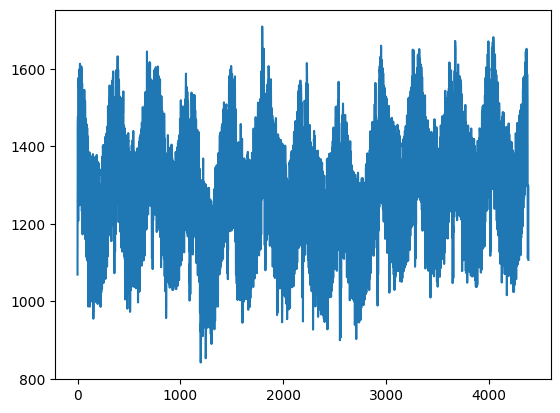

In [101]:
df['Consumption'].plot()

### Checking the order of AR model

P-value:  4.744054901842357e-08


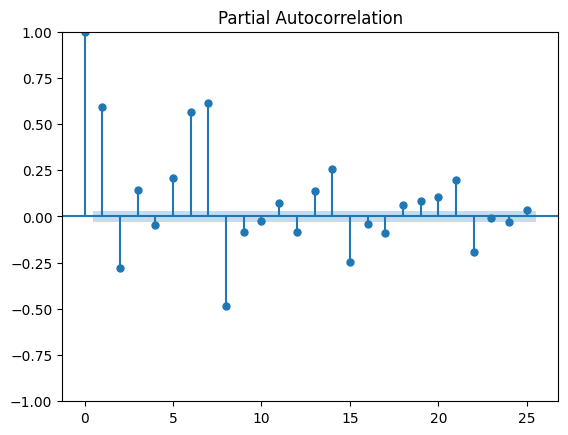

In [102]:
#
# Check for stationarity of the time-series data
# We will look for p-value. In case, p-value is less than 0.05, the time series
# data can said to have stationarity
#
from statsmodels.tsa.stattools import adfuller
#
# Run the test
#
df_stationarityTest = adfuller(df['Consumption'], autolag='AIC')
#
# Check the value of p-value
#
print("P-value: ", df_stationarityTest[1])
#
# Next step is to find the order of AR model to be trained
# for this, we will plot partial autocorrelation plot to assess
# the direct effect of past data on future data
#
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(df['Consumption'], lags=25)

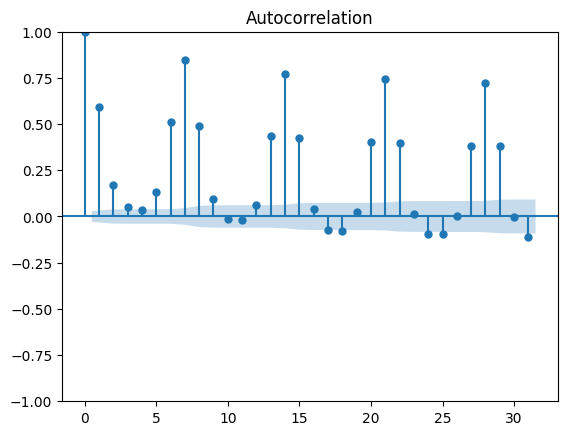

In [106]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Consumption'], lags=31)
plt.show()

### Train the model

In [103]:
#
# Create training and test data
#
train_data = df['Consumption'][:len(df)-100]
test_data = df['Consumption'][len(df)-100:]
#
# Instantiate and fit the AR model with training data
#
ar_model = AutoReg(train_data, lags=8).fit()
#
# Print Summary
#
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:            Consumption   No. Observations:                 4283
Model:                    AutoReg(10)   Log Likelihood              -24201.465
Method:               Conditional MLE   S.D. of innovations             69.747
Date:                Thu, 14 Dec 2023   AIC                          48426.931
Time:                        11:22:58   BIC                          48503.252
Sample:                            10   HQIC                         48453.894
                                 4283                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             135.4620     14.638      9.254      0.000     106.771     164.153
Consumption.L1      0.5931      0.015     38.778      0.000       0.563       0.623
Consumption.L2     -0.0359      

### Predictions

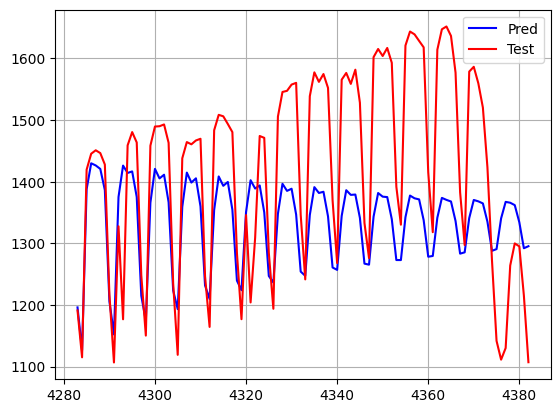

In [104]:
#
# Make the predictions
#
pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)
#
# Plot the prediction vs test data
#
plt.plot(pred, color='blue', label='Pred')
plt.plot(test_data, color='red', label='Test')
plt.legend()
plt.grid()